<a href="https://colab.research.google.com/github/aashutoshkumarbhardwaj/today1/blob/master/day35.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#this is the day 35 of coding and we are working on error or missing data handelingh and today is vewry important day of our day time

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cd=pd.read_csv('/content/sample_data/data_science_job.csv')

In [3]:
cd.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [5]:
cd.isnull().mean()*100

,0
enrollee_id,0.000000
city,0.000000
city_development_index,2.500261
gender,23.530640
relevent_experience,0.000000
enrolled_university,2.014824
education_level,2.401086
major_discipline,14.683161
experience,0.339284
company_size,30.994885


In [6]:
cd.shape

(19158, 13)

In [7]:
cols=[var for var in cd.columns if cd[var].isnull().mean()<0.05 and cd[var].isnull().mean()>0 ]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [8]:
cd[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
4454,0.920,Full time course,Graduate,7.0,56.0
15337,0.920,no_enrollment,Graduate,20.0,143.0
2156,0.550,no_enrollment,Graduate,5.0,228.0
5327,0.920,no_enrollment,Masters,7.0,20.0
8092,0.896,no_enrollment,Masters,10.0,122.0


In [32]:
cd['education_level'].value_counts()

,count
education_level,
Graduate,11598
Masters,4361
High School,2017
Phd,414
Primary School,308


In [10]:
len(cd[cols].dropna())/len(cd)

0.8968577095730244

In [12]:
new_cd=cd[cols].dropna()
cd.shape,new_cd.shape

((19158, 13), (17182, 5))

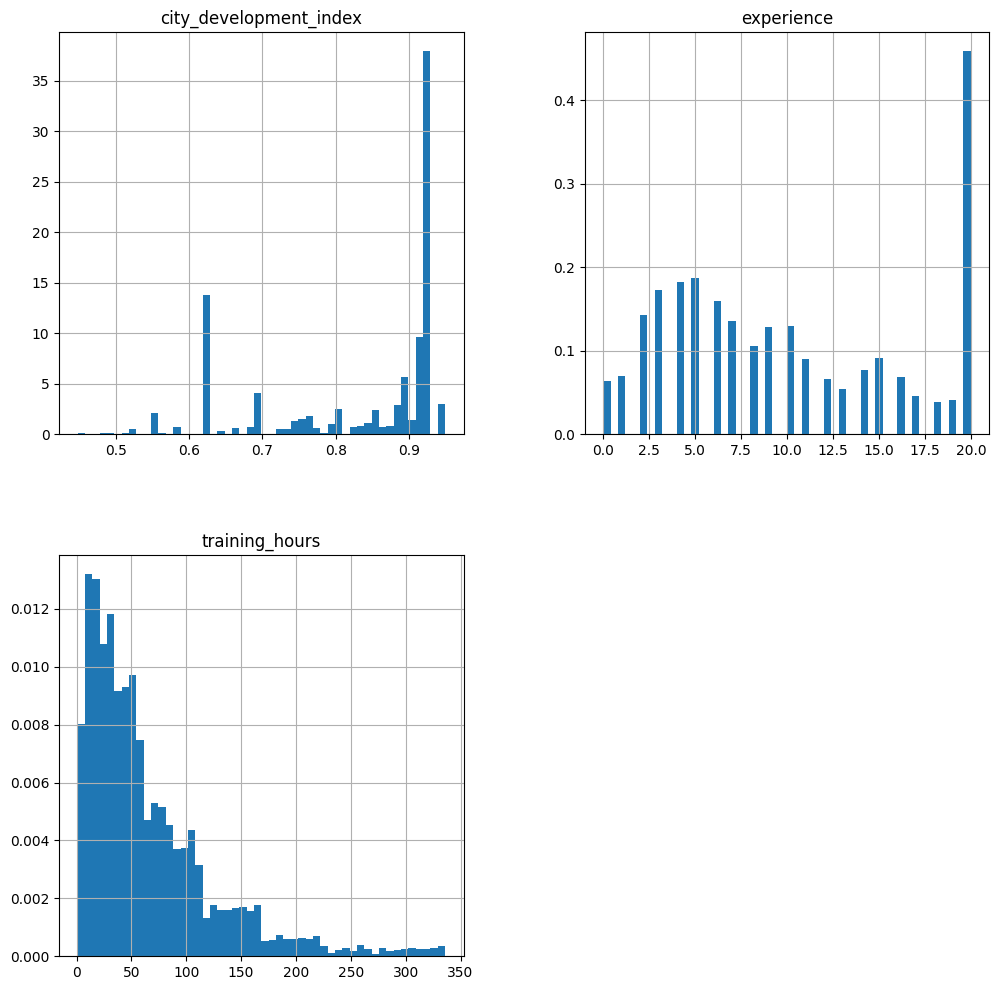

In [13]:
new_cd.hist(bins=50, density=50 , figsize=(12,12))
plt.show()


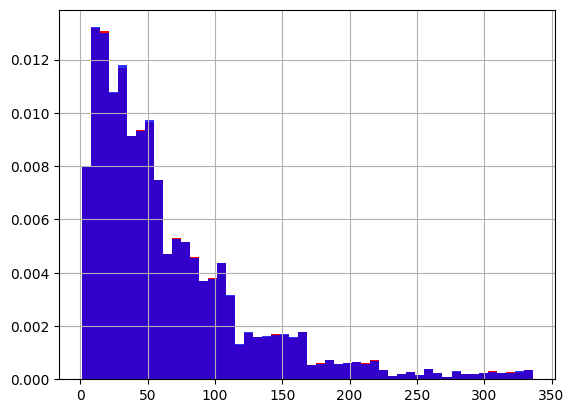

In [14]:
fig=plt.figure()
ax= fig.add_subplot(111)

cd['training_hours'].hist(bins=50,ax=ax, density=True,color='red')
new_cd['training_hours'].hist(bins=50,ax=ax, density=True,color='blue',alpha=0.8)
plt.show()

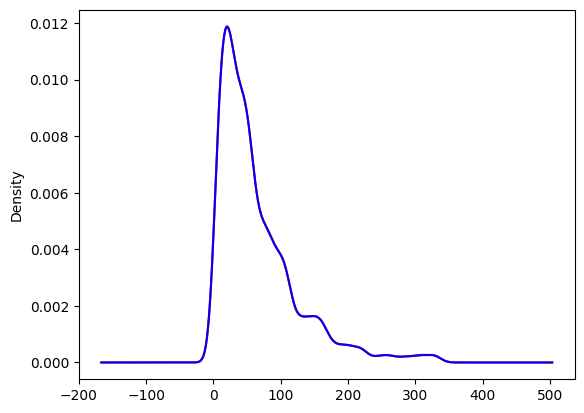

In [15]:
fig=plt.figure()
ax= fig.add_subplot(111)

cd['training_hours'].plot.density(color='red')

new_cd['training_hours'].plot.density(color='blue')
plt.show()

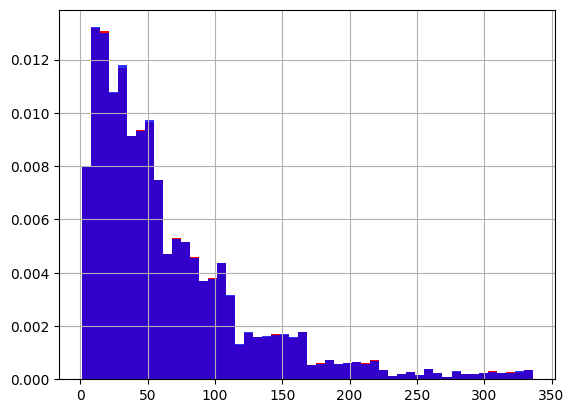

In [16]:
fig=plt.figure()
ax= fig.add_subplot(111)

cd['training_hours'].hist(bins=50,ax=ax, density=True,color='red')
new_cd['training_hours'].hist(bins=50,ax=ax, density=True,color='blue',alpha=0.8)


plt.show()

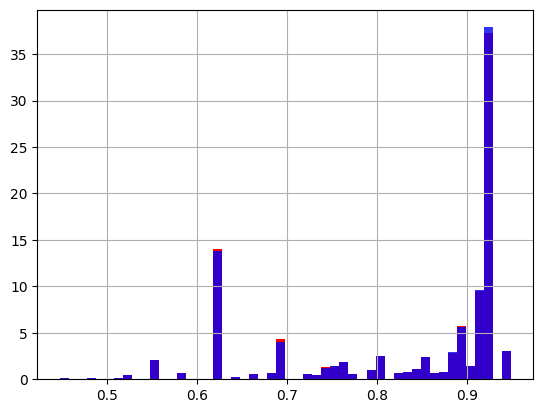

In [17]:
fig=plt.figure()
ax= fig.add_subplot(111)

cd['city_development_index'].hist(bins=50,ax=ax, density=True,color='red')
new_cd['city_development_index'].hist(bins=50,ax=ax, density=True,color='blue',alpha=0.8)


plt.show()

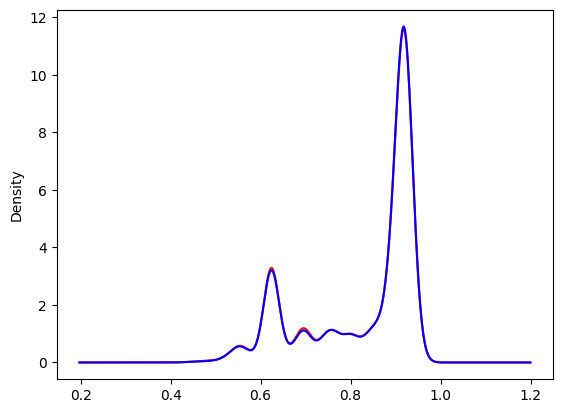

In [18]:
fig=plt.figure()
ax= fig.add_subplot(111)

cd['city_development_index'].plot.density(color='red')

new_cd['city_development_index'].plot.density(color='blue')
plt.show()

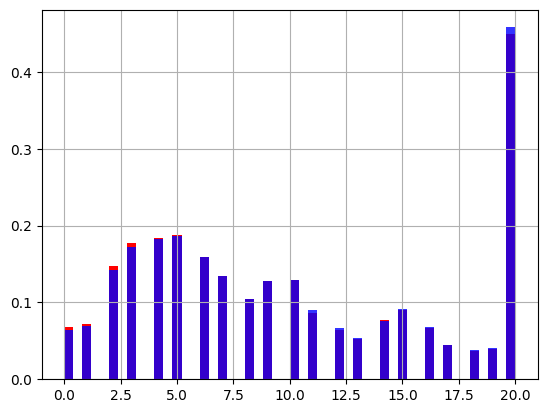

In [19]:
fig=plt.figure()
ax= fig.add_subplot(111)

cd['experience'].hist(bins=50,ax=ax, density=True,color='red')
new_cd['experience'].hist(bins=50,ax=ax, density=True,color='blue',alpha=0.8)


plt.show()

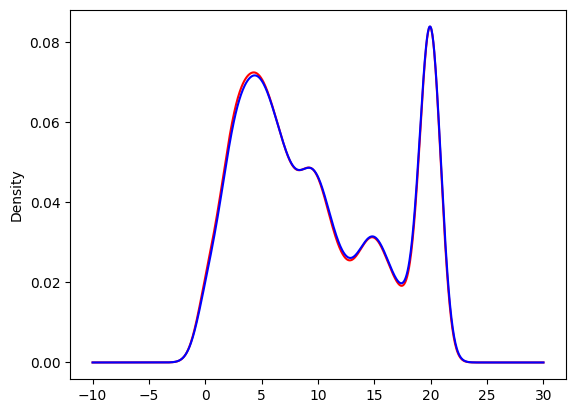

In [20]:
fig=plt.figure()
ax= fig.add_subplot(111)

cd['experience'].plot.density(color='red')

new_cd['experience'].plot.density(color='blue')
plt.show()

In [28]:
temp =  pd.concat([
        cd['enrolled_university'].value_counts()/len(cd),
        new_cd['enrolled_university'].value_counts()/len(new_cd)
],
        axis=1)

temp.columns=['original','cca']
temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079
